In [1]:
import lumpyrem as lm

import pyemu
from pyemu import Pst

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import shutil

flopy is installed in C:\ProgramData\Anaconda3\lib\site-packages\flopy


In [2]:
# read observation data
obs = pd.read_csv('head_obs.csv')
obs['DATA'] = pd.to_datetime(obs['DATA'])
obs.describe()

,606/1042,606/1050,606/985
count,498.000000,370.000000,260.000000
mean,16.861064,14.938973,22.135538
std,5.997583,4.291834,7.656888
min,4.210000,1.110000,0.730000
25%,12.310000,11.700000,16.962500
50%,16.150000,14.925000,22.050000
75%,21.052500,18.037500,28.215000
max,38.000000,24.410000,44.180000


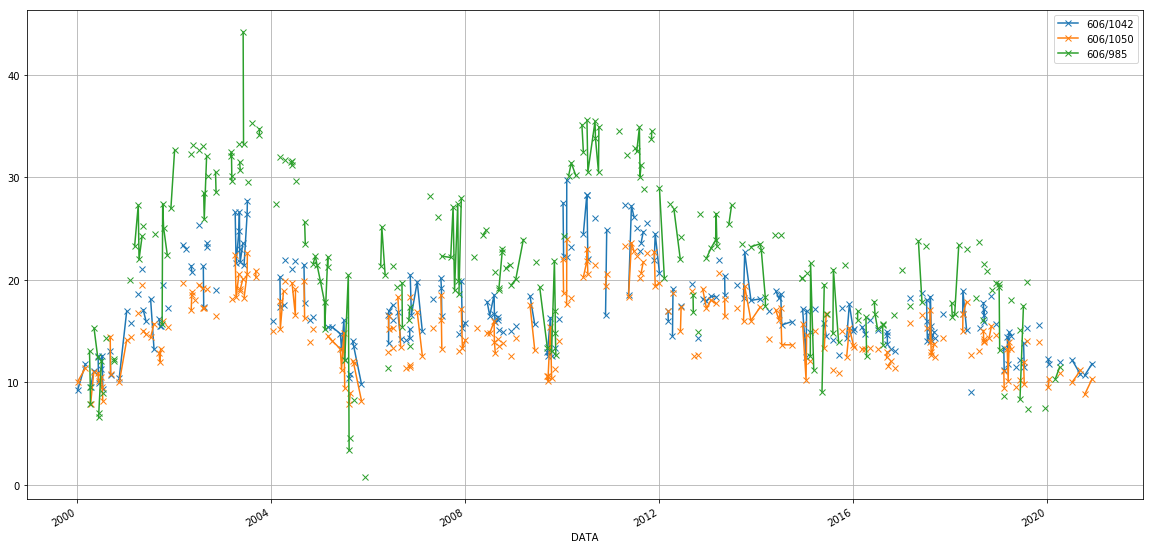

In [3]:
#subselect data
post2000 = obs[obs['DATA']>'01/01/2000']
post2000.plot(x='DATA',figsize=(20,10), marker='x', grid=True); #y='606/1042', 

In [6]:
lmpest = lm.pest.Pst(controlfile='test1.pst')
lmpest.write_pst()

In [14]:
pyemu.utils.write  # write_df_tpl('test_df2tpl.tpl', post2000, sep=',', tpl_marker='~', **kwargs)

AttributeError: module 'pyemu.utils' has no attribute 'write_df_tpl'

In [4]:
pst_name = 'temp.pst'
p = Pst(pst_name)

In [12]:
#p.add_observations()

p.add_observations()

# Things to use


pyemu.utils.setup_temporal_diff_obs(pst, ins_file, out_file=None, include_zero_weight=False, include_path=False, sort_by_name=True, long_names=True, prefix='dif')

pyemu.utils.apply_temporal_diff_obs(config_file)

In [6]:
help(p)

ons
 |      
 |      Note:
 |          user beware!
 |  
 |  calculate_pertubations(self)
 |      experimental method to calculate finite difference parameter
 |      pertubations.
 |      
 |      Note:
 |      
 |          The pertubation values are added to the
 |          `Pst.parameter_data` attribute - user beware!
 |  
 |  enforce_bounds(self)
 |      enforce bounds violation
 |      
 |      Note:
 |          cheap enforcement of simply bringing violators back in bounds
 |  
 |  get(self, par_names=None, obs_names=None)
 |      get a new pst object with subset of parameters and/or observations
 |      
 |      Args:
 |          par_names ([`str`]): a list of parameter names to have in the new Pst instance.
 |              If None, all parameters are in the new Pst instance. Default
 |              is None
 |          obs_names ([`str`]): a list of observation names to have in the new Pst instance.
 |              If None, all observations are in teh new Pst instance. Default
 |

In [7]:
p.prior_information.head()

,pilbl,obgnme


In [8]:
print(p.npar,p.nobs,p.nprior)

45 1 0


In [9]:
print(p.par_groups,p.obs_groups)

['maxvol', 'irigvf', 'rdelay', 'mdelay', 'ks', 'm', 'l', 'mfmax', 'offset', 'fac1', 'fac2', 'power', 'crfac', 'gamma', 'gwirfr'] ['obgnme']


In [10]:
print(type(p.par_names)) # all parameter names
print(type(p.adj_par_names)) # adjustable parameter names
print(type(p.obs_names)) # all observation names
print(type(p.nnz_obs_names)) # non-zero weight observations

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [11]:
print('jacupdate = {0}'.format(p.control_data.jacupdate))
print('numlam = {0}'.format(p.control_data.numlam))
p.control_data.numlam = 10
print('numlam has been changed to --> {0}'.format(p.control_data.numlam))

jacupdate = 999
numlam = 10
numlam has been changed to --> 10
